# Lecture 20 - Introduction to PyTorch

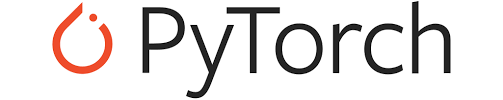

# What is PyTorch?

PyTorch was first released in October 2016.

PyTorch is a library for Python that facilitates building deep learning projects. It emphasizes flexibility and allows deep learning models to be expressed in idiomatic Python.

PyTorch provides a core data structure, the ```Tensor```, a multi-dimensional array that shares many similarities with ```Numpy``` arrays.

## Installing PyTorch

PyTorch is available as a Python package and you can either use ```pip```, or ```conda```, to build it or you can build it from source. The recommended approach for this book is to use the Anaconda Python 3 distribution. 

In the [PyTorch homepage](https://pytorch.org/) scroll to "quick start locally" to copy the command you should run using ```conda``` to install PyTorch in your machine. 

## Tensor: the basic unit in PyTorch

A **tensor** is a multi-dimensional array.

<div><img src="figures/tensor.png", width="500"><!div>

```PyTorch``` is not the only library dealing with multi-dimensional arrays. ```NumPy``` is by far the most popular multidimensional array library. In fact, ```PyTorch``` features seamless interoperability with ```NumPy```, which brings with it first class integration with the rest of the scientific libraries in Python, such as ```SciPy```, ```Scikit-learn```, and
```Pandas```.

Compared to ```NumPy``` arrays, ```PyTorch``` tensors have a few superpowers, such as the ability to perform very fast operations on Graphical Processing Units (GPUs), to distribute operations on multiple devices or machines, or to keep track of the graph of computations that created them. These are all important features when implementing a modern deep learning library.

In [1]:
import torch

In [3]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [4]:
a[1]

tensor(1.)

In [5]:
float(a[1])

1.0

In [6]:
a[2] = 2.0
a

tensor([1., 1., 2.])

Python lists or tuples of numbers are collections of Python objects that are individually allocated in memory. 

PyTorch tensors or NumPy arrays on the other hand are viewed over (typically) contiguous memory blocks containing unboxed numeric types rather than Python objects.

<div><img src="figures/tensorObject.png", width="500"><!div>

For example, let's create samples that form the 2-Dtriangle connecting the vertices (4, 1), (5, 3) and (2, 1).

In [7]:
points = torch.tensor([4.0,1.0,5.0,3.0,2.0,1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

In [8]:
points = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [9]:
points.shape

torch.Size([3, 2])

### Indexing Tensors

In [10]:
points[0]

tensor([4., 1.])

In [11]:
points[:,0]

tensor([4., 5., 2.])

In [12]:
points[0,1]

tensor(1.)

In [13]:
points[:,-1]

tensor([1., 3., 1.])

Let's consider how we would handle a tensor that is representing an image:

In [14]:
img = torch.randn(3,5,5) 
weights = torch.tensor([0.2125,0.7154, 0.0721])

In [15]:
batch = torch.randn(100,3,5,5)
batch.shape

torch.Size([100, 3, 5, 5])

In [16]:
img_gray_naive = img.mean(-3)
batch_gray_naive = batch.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([100, 5, 5]))

In [17]:
unsqueezed_weights = weights
unsqueezed_weights, unsqueezed_weights.shape

(tensor([0.2125, 0.7154, 0.0721]), torch.Size([3]))

In [18]:
unsqueezed_weights = weights.unsqueeze(-1)
unsqueezed_weights, unsqueezed_weights.shape

(tensor([[0.2125],
         [0.7154],
         [0.0721]]), torch.Size([3, 1]))

In [19]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
unsqueezed_weights, unsqueezed_weights.shape

(tensor([[[0.2125]],
 
         [[0.7154]],
 
         [[0.0721]]]), torch.Size([3, 1, 1]))

In [20]:
img_weights = (img * unsqueezed_weights)
batch_weights = (batch * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
img_gray_weighted.shape, batch_gray_weighted.shape

(torch.Size([5, 5]), torch.Size([100, 5, 5]))

### Named Tensors

PyTorch 1.3 added **named tensors** as an experimental feature. Tensor factory functions such as ```tensor``` take a ```names``` argument. The names should be a sequence of strings.

In [21]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

..\c10/core/TensorImpl.h:845: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable.


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

When we already have a tensor and want to add names (but not change existing ones), we can call the method ```refine_names``` on it. Similar to indexing, the ellipsis ```…``` allows you to leave out any number of dimensions. With the ```rename``` sibling method you can also overwrite or drop (by passing in None) existing names.

In [23]:
img_named = img.refine_names(...,'channels','rows','columns')
batch_named = batch.refine_names(...,'channels','rows','columns')

print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([100, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [25]:
weights_aligned = weights_named.align_as(img_named)

weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [26]:
gray_image = (img_named * weights_aligned).sum('channels')

gray_image.shape, gray_image.names

(torch.Size([5, 5]), ('rows', 'columns'))

### The Tensor API

The vast majority of operations on and between tensors are available under the ```torch``` module.

In [29]:
a = torch.ones(3,2)
# a_t = a.T
# a_t = torch.t(a)
a_t = a.transpose(0,1)

a.shape, a_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

In [30]:
c = a @ a_t

c.shape

torch.Size([3, 3])

PyTorch documentation is exhaustive and well organized, with the tensor operations divided into groups. Let's check it out: www.pytorch.org/docs 

## Linear Regression using PyTorch

**Example:** We just got back from our trip to some obscure location, we brought back a fancy, wall-mounted analog thermometer. It looks great, it's a perfect fit for our living room. Its only flaw: it doesn't khow units. We'll build a dataset of readings and corresponding temperature values in our favorite units, choose a model, adjust its weights iteratively until a measure of the error is low enough and we’ll finally be able to interpret the new readings in units we understand.

In [31]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # Temperature in Celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # Temperature in unknown 
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u.shape, t_u

(torch.Size([11]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

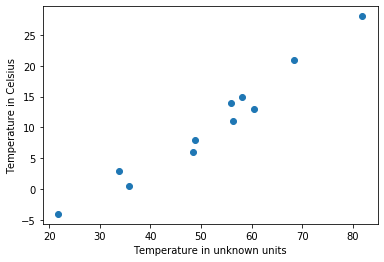

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(t_u,t_c);
plt.xlabel('Temperature in unknown units')
plt.ylabel('Temperature in Celsius');

In [33]:
t_c = t_c.unsqueeze(1)
t_u = t_u.unsqueeze(1)

t_u.shape, t_u

(torch.Size([11, 1]), tensor([[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000],
         [33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000]]))

Let's consider the output of a neuron unit as a linear function:

$$y = wx + b$$

where $y$ correspond to the temperature in Celsius and $x$ correspond to the temperature in unknown unit.

In [34]:
def model(x, w, b):
    return w * x + b

In [35]:
def loss_fn(prediction, y):
    squared_diffs = (prediction - y)**2
    return squared_diffs.mean()

In [36]:
w = torch.ones(())
b = torch.zeros(())

prediction = model(t_u, w, b)
prediction

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [37]:
loss = loss_fn(prediction, t_c)
loss

tensor(1763.8846)

In [38]:
delta = 0.1

# definition of gradient
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [39]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [40]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [41]:
def dloss_fn(prediction, y):
    dsq_diffs = 2 * (prediction - y) / prediction.size(0) # derivative of the loss function
    return dsq_diffs

In [42]:
def dmodel_dw(x, w, b):
    return x

def dmodel_db(x, w, b):
    return 1.0

Putting all this together, the function returning the gradient of the loss with respect to $w$ and $b$ is:

In [43]:
def grad_fn(x, y, prediction, w, b):
    dloss_dtp = dloss_fn(prediction, y)
    dloss_dw = dloss_dtp * dmodel_dw(x, w, b)
    dloss_db = dloss_dtp * dmodel_db(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [44]:
def training_loop(n_epochs, learning_rate, params, x, y, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        prediction = model(x, w, b)  # Forward pass
        loss = loss_fn(prediction, y)
        grad = grad_fn(x, y, prediction, w, b)  # Backward pass

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}: 
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break 
            
    return params

In [45]:
training_loop(
n_epochs = 100,
learning_rate = 1e-4,
params = torch.tensor([1.0,0.0]),
x = t_u,
y = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4667,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [46]:
t_un = 0.1 *t_u

In [48]:
training_loop(
n_epochs = 100,
learning_rate = 1e-4,
params = torch.tensor([1.0,0.0]),
x = t_un,
y = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.0078, 0.0011])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 79.752480
    Params: tensor([1.0155, 0.0021])
    Grad:   tensor([-77.1465, -10.5575])
Epoch 3, Loss 79.148026
    Params: tensor([1.0231, 0.0032])
    Grad:   tensor([-76.6818, -10.4754])
...
Epoch 10, Loss 75.116219
    Params: tensor([1.0755, 0.0103])
    Grad:   tensor([-73.5070,  -9.9150])
Epoch 11, Loss 74.567734
    Params: tensor([1.0829, 0.0113])
    Grad:   tensor([-73.0644,  -9.8368])
...
Epoch 99, Loss 45.087246
    Params: tensor([1.5803, 0.0721])
    Grad:   tensor([-42.9955,  -4.5296])
Epoch 100, Loss 44.900906
    Params: tensor([1.5845, 0.0726])
    Grad:   tensor([-42.7380,  -4.4842])


tensor([1.5845, 0.0726])

In [52]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0,0.0]),
x = t_un,
y = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030487
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941875
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])
...
Epoch 4000, Loss 2.927680
    Params: tensor([  5.3643, -17.2853])
    Grad:   tensor([-0.0006,  0.0033])
Epoch 5000, Loss 2.927648
    Params: tensor([  5.3671, -17.3012])
    Grad:   tensor([-0.0001,  0.0006])


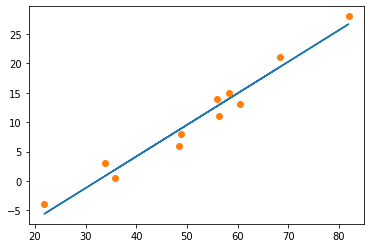

In [53]:
prediction = model(t_un, *params)

plt.plot(t_u.numpy(), prediction.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o');

## PyTorch's Autograd

Depending on the cost function we use, we will need to compute the updates by hand... That's not good!

This is when PyTorch tensors come to the rescue, with a PyTorch component called autograd. Given a forward expression, no
matter how nested, PyTorch will provide the gradient of that expression with respect to its input parameters automatically.

In [54]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        prediction = model(x, *params)
        loss = loss_fn(prediction, y)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [56]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0,0.0], requires_grad=True),
x = t_un,
y = t_c)
params

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [57]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

## Using a Neural Network

PyTorch has a whole submodule dedicated to neural networks, called ```torch.nn```. It contains the building blocks needed to create all sorts of neural network architectures. Those building blocks are called modules in PyTorch parlance (these building blocks are often referred to as layers in other frameworks).

In [58]:
n_samples = t_un.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 1,  5,  0,  7,  3,  6,  2, 10,  9]), tensor([8, 4]))

In [59]:
t_un_train = t_un[train_indices]
t_c_train = t_c[train_indices]

t_un_val = t_un[val_indices]
t_c_val = t_c[val_indices]

In [61]:
import torch.nn as nn

# y=f(wx+b) where f(x)=x

linear_model = nn.Linear(1,1)
linear_model(t_un_val), t_un_val

(tensor([[-0.6210],
         [-0.8001]], grad_fn=<AddmmBackward>), tensor([[4.8400],
         [5.6300]]))

In [62]:
linear_model.weight

Parameter containing:
tensor([[-0.2266]], requires_grad=True)

In [63]:
linear_model.bias

Parameter containing:
tensor([0.4759], requires_grad=True)

In [64]:
x = torch.ones(1)
linear_model(x)

tensor([0.2493], grad_fn=<AddBackward0>)

In [65]:
linear_model.parameters()

<generator object Module.parameters at 0x0000019CE1719ED0>

In [66]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2266]], requires_grad=True), Parameter containing:
 tensor([0.4759], requires_grad=True)]

In [67]:
linear_model = nn.Linear(1,1) #everytime you call this function it's going to initialize the parameters with a different value
optimizer = optim.SGD(
linear_model.parameters(),
lr = 1e-2)

In [68]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        pred_train = model(x_train)
        loss_train = loss_fn(pred_train, y_train)
        
        pred_val = model(x_val)
        loss_val = loss_fn(pred_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))

In [69]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
n_epochs=3000,
optimizer=optimizer,
model = linear_model, 
loss_fn = nn.MSELoss(), 
x_train = t_un_train, 
x_val = t_un_val, 
y_train = t_c_train, 
y_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 192.78611755371094, Validation loss 69.76477813720703
Epoch 1000, Training loss 2.59861159324646, Validation loss 9.267106056213379
Epoch 2000, Training loss 2.1237168312072754, Validation loss 8.171891212463379
Epoch 3000, Training loss 2.115502119064331, Validation loss 8.03445816040039

Parameter containing:
tensor([[5.3616]], requires_grad=True)
Parameter containing:
tensor([-16.7592], requires_grad=True)


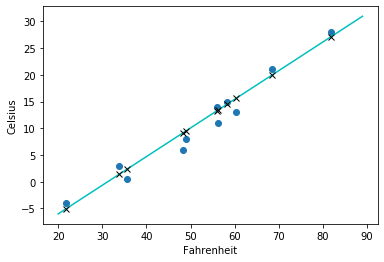

In [71]:
t_range = torch.arange(20., 90.).unsqueeze(1)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), linear_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), linear_model(0.1 * t_u).detach().numpy(), 'kx');

## Subclassing nn.Module

Adding model complexity...

In [72]:
seq_model = nn.Sequential(
nn.Linear(1,13),
nn.Tanh(),
nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [73]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [74]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

## Example: distinguishing birds from airplanes using CIFAR-10 data set

CIFAR-10 consists of 60000 tiny 32x32 color (RGB) images, labeled with an integer corresponding to 10 classes, namely airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9).

In [75]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch6/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/
Files already downloaded and verified


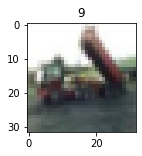

In [77]:
img, label = cifar10[2]

plt.figure(figsize=(2,2))
plt.imshow(img)
plt.title(label)
plt.show()

In [79]:
type(img)

PIL.Image.Image

In [80]:
from torchvision import transforms

dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [82]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [83]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [84]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [89]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [90]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [91]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                                (0.2470, 0.2435, 0.2616))
                                       ]))

Distinguishing birds from airplanes...

In [92]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [94]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512,2),
nn.Softmax(dim=1))

# Softmax ouptus probability value for each class

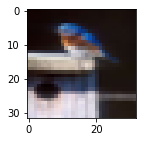

In [95]:
img, _ = cifar2[1]

plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

In [101]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [102]:
img_sample = img_t.view(-1).unsqueeze(0)
out = model(img_sample)
out

tensor([[0.4853, 0.5147]], grad_fn=<SoftmaxBackward>)

In [170]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 10

for epoch in range(n_epochs):
    for img, label in cifar2:
        img = to_tensor(img)
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.311792
Epoch: 1, Loss: 1.496687
Epoch: 2, Loss: 1.925069
Epoch: 3, Loss: 2.282611
Epoch: 4, Loss: 2.662120
Epoch: 5, Loss: 3.253624
Epoch: 6, Loss: 3.380375
Epoch: 7, Loss: 3.722273
Epoch: 8, Loss: 4.608356
Epoch: 9, Loss: 4.933189


If you have a GPU, use it! 

The last script only runs for 10 iterations and therefore the accuracy in both training and test sets will be drastically impacted... You can try with e.g. 100 epochs.

In [213]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in cifar2:
        imgs = to_tensor(imgs)
        outputs = model(imgs.view(-1).unsqueeze(0))
        _, predicted = torch.max(outputs, dim=1)
        total += 1
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.491700


In [214]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in cifar2_val:
        imgs = to_tensor(imgs)
        outputs = model(imgs.view(-1).unsqueeze(0))
        _, predicted = torch.max(outputs, dim=1)
        total += 1
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.492000
